# Tasca M5 T01

## Exercicis d'Hipotesis Testing.

## - Exercici 1
## Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 



In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [350]:
import chardet

archivo_entrada = 'ligaseuropeas.csv'  

with open(archivo_entrada, 'rb') as archivo:
    resultado = chardet.detect(archivo.read())

codificacion = resultado['encoding']

codificacion

'Windows-1252'

### Al intentar importar el DataSet "ligaseuropeas.cvs" nos encontramos con un error al ejecutar el comando read_csv ya que la codificacion del archivo no es compatible con UTF-8 con la que trabaja python. 

### Para solucionar el problema primero tenemos que averiguar cual es la codificacion que trae el archivo para ello importamos la biblioteca chardet que detecta automaticamente que formato tiene el archivo que intentamos importar en este caso es 'Windows-1252''.

In [351]:

archivo_entrada = 'ligaseuropeas.csv'
archivo_salida = 'ligaseuropeas_utf8.csv'

codificacion_actual = 'Windows-1252'

with open(archivo_entrada, 'r', encoding=codificacion_actual) as archivo_entrada:
    contenido = archivo_entrada.read()

with open(archivo_salida, 'w', encoding='utf-8') as archivo_salida:
    archivo_salida.write(contenido)

### El siguiente paso es convertir este archivo en formato 'Windows-1252' a UTF-8 con el que trabaja Python. Para ello utilizaremos el comando open() en donde indicaremos que primero abra el archivo en su formato original y lo guarde tal cual en el formato que indicamos anteriormente.

In [352]:
df = pd.read_csv('ligaseuropeas_utf8.csv')
df

,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper
0,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;...
1,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;8...
2,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;...
3,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2....
4,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;7...
...,...
93,94;Bordeaux;FRA;20;37;5;13;19;48;89;-41;28;0.7...
94,95;Venezia;ITA;20;37;6;8;23;34;69;-35;26;0.7;3...
95,96;Watford;ENG;19;37;6;5;26;33;75;-42;23;0.62;...
96,97;Norwich City;ENG;20;37;5;7;25;23;79;-56;22;...


### Luego de comprobar su funcionamiento vemos que el archivo puede ser leido correctamente y cuanta con 98 registros alojados en una sola columna lo cual tendremos que solucionar en la siguiente linea para poder operar con el DataSet.

In [353]:
ligas_europeas = pd.read_csv('ligaseuropeas_utf8.csv', sep='\t', encoding='utf-8')
ligas_europeas

,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper
0,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;...
1,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;8...
2,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;...
3,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2....
4,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;7...
...,...
93,94;Bordeaux;FRA;20;37;5;13;19;48;89;-41;28;0.7...
94,95;Venezia;ITA;20;37;6;8;23;34;69;-35;26;0.7;3...
95,96;Watford;ENG;19;37;6;5;26;33;75;-42;23;0.62;...
96,97;Norwich City;ENG;20;37;5;7;25;23;79;-56;22;...


In [354]:
ligas_europeas = pd.read_csv('ligaseuropeas_utf8.csv', delimiter=';', encoding='utf-8')
ligas_europeas

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


### habiendo indicado anteriormente mediante el parametro sep='\t' dentro del comando read_csv comprobamos que no funcionaba, por lo que hemos cambiado este parametro por delimiter='::' indicando que separe las columnas lo que ha funcionado correctamente.

In [355]:
ligas_europeas.shape

(98, 21)

### Comprobamos una vez mas que tiene 98 rows y 21 columnas

In [356]:
ligas_europeas.columns

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

### nombres de las columas

## Column Description

### Rk - Rank
### Squad - Team Name
### Country - Name of the Country
### LgRk - Squad Finish In Competition
### MP - Matches Played
### W - Wins
### D - Draws
### L - Losses
### GF - Goals For
### GA - Goals Against
### GD - Goal Difference
### Pts - Points (3 for a Win and 1 for a Draw)
### Pts/G - Points per Game
### xG - Expected Goals inclusive of penalty kicks (not inclusive of penalty shootouts until noticed)
### xGA - Expected Goals Allowed (not inclusive of penalty shootouts until noticed)
### xGD - Expected Goal Difference (not inclusive of penalty shootouts until noticed)
### xGD/90 - Expected Goal Difference per 90 minutes (not inclusive of penalty shootouts until noticed)
### Last 5 - Last 5 matches ordered chronologically from left to right
### Attendance - Attendance per game during the season, only for home matches
### Top Team Scorer - Inclusive of only League matches during that season
### Goalkeeper - Goalkeeper with the most minutes in the league play

In [357]:
df_liga_inglesa= ligas_europeas[ligas_europeas['Country'] == 'ENG']
df_liga_española= ligas_europeas[ligas_europeas['Country'] == 'ESP']
df_liga_alemana= ligas_europeas[ligas_europeas['Country'] == 'GER']
df_liga_francesa= ligas_europeas[ligas_europeas['Country'] == 'FRA']

### Creamos las variables necesarias para dividir el Data Set en ligas para asi poder trabajar independientemente con los datos de cada una de ellas, ya que por ejemplo en la liga inglesa se han jugado mas partidos que en la francesa.

In [358]:
df_liga_inglesa

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
10,11,Chelsea,ENG,3,36,20,10,6,73,31,...,70,1.94,63.2,34.9,28.4,0.79,W D L D W,36991,Mason Mount - 11,Edouard Mendy
14,15,Tottenham,ENG,4,37,21,5,11,64,40,...,68,1.84,61.5,39.0,22.5,0.61,D W D W W,56234,Son Heung-min - 21,Hugo Lloris
17,18,Arsenal,ENG,5,36,21,3,12,56,45,...,66,1.83,56.3,44.0,12.2,0.34,W W W W L,59636,Bukayo Saka - 11,Aaron Ramsdale
33,34,Manchester Utd,ENG,6,37,16,10,11,57,56,...,58,1.57,53.9,54.3,-0.4,-0.01,L L D W L,73150,Cristiano Ronaldo - 18,David de Gea
36,37,West Ham,ENG,7,37,16,8,13,59,48,...,56,1.51,49.8,49.4,0.4,0.01,D L L W D,58370,Jarrod Bowen - 12,?ukasz Fabia?ski
41,42,Wolves,ENG,8,37,15,6,16,37,40,...,51,1.38,34.8,57.0,-22.2,-0.60,L L D L D,30777,Raúl Jiménez - 6,José Sá
46,47,Leicester City,ENG,9,36,13,9,14,57,57,...,48,1.33,48.5,58.2,-9.7,-0.27,D L L W W,32521,Jamie Vardy - 14,Kasper Schmeichel
48,49,Brighton,ENG,10,37,11,15,11,39,43,...,48,1.30,44.3,45.3,-1.0,-0.03,L D W W D,30931,Leandro Trossard Neal Maupay - 8,Robert Sánchez


### Realizamos un primer print de los datos de la liga inglesa.

In [359]:
df_liga_inglesa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 96
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               20 non-null     int64  
 1   Squad            20 non-null     object 
 2   Country          20 non-null     object 
 3   LgRk             20 non-null     int64  
 4   MP               20 non-null     int64  
 5   W                20 non-null     int64  
 6   D                20 non-null     int64  
 7   L                20 non-null     int64  
 8   GF               20 non-null     int64  
 9   GA               20 non-null     int64  
 10  GD               20 non-null     int64  
 11  Pts              20 non-null     int64  
 12  Pts/G            20 non-null     float64
 13  xG               20 non-null     float64
 14  xGA              20 non-null     float64
 15  xGD              20 non-null     float64
 16  xGD/90           20 non-null     float64
 17  Last 5           2

### Una vez tenemos todas las columnas y registros que nos interesan mediante el metodo info() comprobamos que no existen valores nulos y cuales son los tipos de datos en nuestras columnas para poder operar con ellas, en este caso solo la columna Squad, Country, Last 5, Top Team Scorer y Goalkeaper contiene datos no numericos ya que pertenece a los nombres de los equipos, jugadores o partidos ganados, empatados o perdidos.

In [360]:
df_liga_inglesa.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,20.0,49.4000,29.692104,1.00,30.0000,50.500,69.7500,97.00
LgRk,20.0,10.5000,5.916080,1.00,5.7500,10.500,15.2500,20.00
MP,20.0,36.5000,0.512989,36.00,36.0000,36.500,37.0000,37.00
W,20.0,13.9500,6.452050,5.00,9.7500,13.000,17.0000,28.00
D,20.0,8.6000,3.470174,3.00,6.0000,8.000,10.2500,15.00
L,20.0,13.9500,6.159930,2.00,11.0000,14.000,17.2500,26.00
GF,20.0,50.9000,18.657297,23.00,39.0000,47.000,57.5000,96.00
GA,20.0,50.9000,15.724269,24.00,42.2500,50.000,59.5000,79.00
GD,20.0,0.0000,32.437795,-56.00,-20.0000,-2.000,11.0000,72.00
Pts,20.0,50.4500,18.348885,22.00,39.0000,47.000,60.0000,90.00


### Con el metodo describe() obtenemos un resumen rapido de las estadisticas de nuestro DataFrame, donde volvemos a comprobar que el minimo de MP es de 36 y el maximo de 'MP' es 37 lo que puede referir a que hay equipos que tienen mas partidos que otros,  o que el minimo de puntos es de 22 mientras que el maximo es 80.

In [361]:
df_liga_inglesa.isna().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

### Con el metodo isna() y sum() comprobamos que no existen valores NaN

In [362]:
df_liga_inglesa.duplicated().sum()

0

### De igual manera con el metodo duplicated() y sum() comprobamos que no existen registros duplicados en nuestro DataSet.

# Planteo de hipotesis:

## Hipótesis nula (H0): Los equipos que tienen mayor diferencia de gol a favor 'GD' no tienen una correlación significativa con los puntos ganados 'Pts' osea que la correlación entre 'GD' y 'Pts' es igual a cero.

## Hipótesis alternativa (H1): Los equipos que tienen mayor diferencia de gol a favor 'GD' tienen una correlación significativa con los puntos ganados 'Pts'. La correlación entre 'GD' y 'Pts' no es igual a cero por lo que las variables son dependientes una de otra.


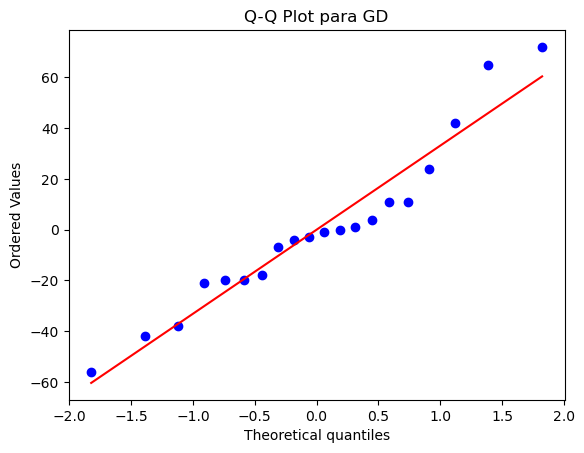

In [363]:
import scipy.stats as stats
import pylab

# Q-Q plot para 'GD'
stats.probplot(df_liga_inglesa['GD'], dist="norm", plot=pylab)
plt.title('Q-Q Plot para GD')
pylab.show()

### Mediante una comprobacion visual de tipo Q-Q Plot cuartil cuartil. Las muestras se dividen en grupos llamados cuantiles. Cada punto de datos de la muestra se empareja con un miembro similar de la distribución idealizada en la misma distribución acumulativa. De esta forma vemos que la distribucion de nuestros datos es lineal, las pequeñas desviaciones en la parte inferior y superior del grafico pueden deberse a que la muestra de datos es pequeña.

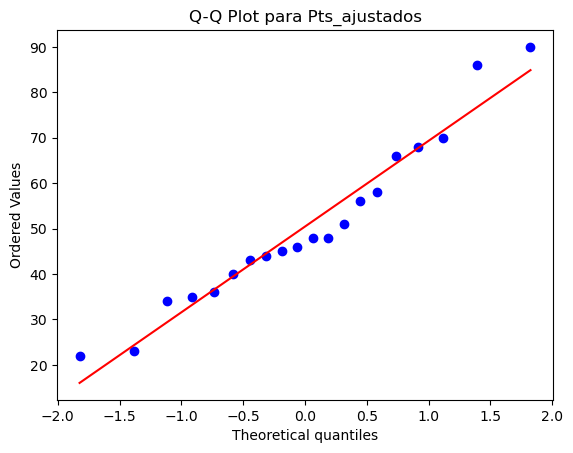

In [364]:
# Q-Q plot para 'Pts_ajustados'
stats.probplot(df_liga_inglesa['Pts'], dist="norm", plot=pylab)
plt.title('Q-Q Plot para Pts_ajustados')
pylab.show()

### De igual manera que con la variable 'GD' representamos otro grafico QQ para nuestra variable 'Pts' y podemos ver que la distribucion de nuestros datos es lineal, con una pequeña desviacion en la parte inferior y superior debido a que es una muestra de datos muy pequeña. De esta forma podemos realizar una prueba de normalidad para saber que distribucion tienen nuestros datos para posteriormente elegir que tipo de prueba estadistica utilizaremos.

In [365]:
from scipy.stats import shapiro

# Prueba de Shapiro-Wilk para 'GD'
Shapiro_test_gd = shapiro(df_liga_inglesa['GD'])
Shapiro_test_gd


ShapiroResult(statistic=0.9417498111724854, pvalue=0.2586990296840668)

In [366]:
Shapiro_test_Pts = shapiro(df_liga_inglesa['Pts'])
Shapiro_test_Pts

ShapiroResult(statistic=0.9504321217536926, pvalue=0.3736962676048279)

### Elegimos la prueba de normaliadad de Shapiro-Wilk, ya que estamos trabajando con menos de 50 muestras y es lo recomendado para este tipo de variables, en otro caso podriamos utilizar el test de Anderson-Darling. Segun los datos arrojados por la prueba para la columna 'GD' el valor P es 0.25 y para la columna 'Pts' el valor P es 0.37 por lo que en ambos casos nuestro valor P es superior a nuestro valor alfa  establecido de 0.05 lo que indica que no podemos rechazar nuestra hipotesis nula H0.

In [367]:
correlacion_pearson = df['Pts'].corr(df['GD'], method='pearson')
correlacion_pearson

KeyError: 'Pts'

### Luego de utilizar el metodo de Pearson ,  el cual sirve para correlaciones cuantitativas podemos ver que la correlacion entre estas dos variables es 0.95 o similar a 1 por lo que podemos decir que existe una correlacion lineal entre ambas variables por lo que una puede depender de la otra lo que rechazaria la hipotisis nula H0 indicandonos que posiblemente si la variable Goles de Diferencia aumente posiblemente lo haga la de Pts.

# Presentacion de hallazgos: 

### Luego de realizar las pruebas de correlacion tanto de Pearson entre las variables 'GD' (Goal Difference) (Diferencia de gol) y 'Pts' (cantidad de puntos al final del campeonato) obtuvimos un resultado de correlacion de 0.95 lo que indica por su cercania al numero 1 que ambas variables son dependientes las una de la otra, de esta manera podemos rechazar la hipotesis nula H0 y tomar como probable la hipostesis alternativa H1 en donde indicamos que los equipos con mayor diferencia de gol al final de un campeonato tienen mayores posibilidades de obtener mayor puntaje por ende ser campeones al final de la competencia.

### De igual manera se realizo una comprobacion visual para estar seguros que la distribucion de las muestras de datos era lineal y no habia alteraciones en las mismas para no tener datos fallidos.

# - Exercici 2
## Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

In [368]:
ligas_europeas

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [369]:
ex2 = ['Squad','Top Team Scorer', 'LgRk', 'Pts']
my_df = df_liga_española[ex2]
my_df.head(15)

,Squad,Top Team Scorer,LgRk,Pts
2,Real Madrid,Karim Benzema - 27,1,85
9,Barcelona,Memphis Depay - 12,2,73
16,Atlético Madrid,Ángel Correa Luis Suárez - 11,3,68
18,Sevilla,Rafa Mir - 9,4,67
20,Betis,Juanmi - 16,5,64
26,Real Sociedad,Mikel Oyarzabal - 9,6,62
35,Villarreal,Arnaut Groeneveld - 10,7,56
37,Athletic Club,Iñaki Williams - 8,8,55
50,Osasuna,Ante Budimir - 8,9,47
52,Celta Vigo,Iago Aspas - 17,10,46


### En este nuevo caso en estudio nos quedaremos con las columnas de interes 'Equipo', 'Goleador del equipo', 'Ranking en su liga' y 'Pts' solo de la liga española

In [370]:
df_liga_española[['Nombre_jugador', 'Goles']] = df_liga_española['Top Team Scorer'].str.extract(r'(.+) - (\d+)')

df_liga_española

/var/folders/qn/t_d0_whn09sdmbx1px99544c0000gn/T/ipykernel_38974/3079789673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liga_española[['Nombre_jugador', 'Goles']] = df_liga_española['Top Team Scorer'].str.extract(r'(.+) - (\d+)')
/var/folders/qn/t_d0_whn09sdmbx1px99544c0000gn/T/ipykernel_38974/3079789673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liga_española[['Nombre_jugador', 'Goles']] = df_liga_española['Top Team Scorer'].str.extract(r'(.+) - (\d+)')


,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Nombre_jugador,Goles
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois,Karim Benzema,27
9,10,Barcelona,ESP,2,37,21,10,6,68,36,...,61.3,35.2,26.1,0.71,L W W W D,53933,Memphis Depay - 12,Marc-André ter Stegen,Memphis Depay,12
16,17,Atlético Madrid,ESP,3,37,20,8,9,63,42,...,51.0,30.9,20.1,0.56,D L W W D,48039,Ángel Correa Luis Suárez - 11,Jan Oblak,Ángel Correa Luis Suárez,11
18,19,Sevilla,ESP,4,37,17,16,4,52,30,...,42.0,36.8,5.2,0.14,W D D D D,29669,Rafa Mir - 9,Yassine Bounou,Rafa Mir,9
20,21,Betis,ESP,5,37,19,7,11,62,40,...,54.0,42.9,11.1,0.30,L D L W W,41749,Juanmi - 16,Rui Silva,Juanmi,16
26,27,Real Sociedad,ESP,6,37,17,11,9,39,35,...,51.5,38.9,12.5,0.34,L D L W W,26992,Mikel Oyarzabal - 9,Álex Remiro,Mikel Oyarzabal,9
35,36,Villarreal,ESP,7,37,15,11,11,61,37,...,61.8,45.9,16.0,0.43,W L D W L,14293,Arnaut Groeneveld - 10,Gerónimo Rulli,Arnaut Groeneveld,10
37,38,Athletic Club,ESP,8,37,14,13,10,43,35,...,49.3,36.9,12.4,0.33,W W D L W,32949,Iñaki Williams - 8,Unai Simón,Iñaki Williams,8
50,51,Osasuna,ESP,9,37,12,11,14,37,49,...,36.3,44.1,-7.8,-0.21,L D D D L,17017,Ante Budimir - 8,Sergio Herrera,Ante Budimir,8
52,53,Celta Vigo,ESP,10,37,12,10,15,43,41,...,43.2,44.9,-1.8,-0.05,L D W L W,10014,Iago Aspas - 17,Matías Dituro,Iago Aspas,17


### Uno de los primeros inconvenientes que vemos es que dentro de la columna 'Top Team Scorer' es que tenemos dos tipos de dato, por un lado el nombre del jugador en formato string y por otro lado la cantidad de goles que ha convertido a lo largo del campeonato, por ello debemos separar estos datos en dos nuevas columnas mediante el metodo str.extract() .

In [371]:
df_liga_española.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2 to 87
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               20 non-null     int64  
 1   Squad            20 non-null     object 
 2   Country          20 non-null     object 
 3   LgRk             20 non-null     int64  
 4   MP               20 non-null     int64  
 5   W                20 non-null     int64  
 6   D                20 non-null     int64  
 7   L                20 non-null     int64  
 8   GF               20 non-null     int64  
 9   GA               20 non-null     int64  
 10  GD               20 non-null     int64  
 11  Pts              20 non-null     int64  
 12  Pts/G            20 non-null     float64
 13  xG               20 non-null     float64
 14  xGA              20 non-null     float64
 15  xGD              20 non-null     float64
 16  xGD/90           20 non-null     float64
 17  Last 5           2

### Una vez separado el string vemos que las nuevas columnas aparecen en formato objeto, en donde para la columna goles nos interesa que sea en formato numerico para poder operar con ella por lo que procederemos a cambiar su formato.

In [372]:
df_liga_española["Goles"] = pd.to_numeric(df_liga_española["Goles"])
df_liga_española

/var/folders/qn/t_d0_whn09sdmbx1px99544c0000gn/T/ipykernel_38974/2747685756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liga_española["Goles"] = pd.to_numeric(df_liga_española["Goles"])


,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Nombre_jugador,Goles
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois,Karim Benzema,27
9,10,Barcelona,ESP,2,37,21,10,6,68,36,...,61.3,35.2,26.1,0.71,L W W W D,53933,Memphis Depay - 12,Marc-André ter Stegen,Memphis Depay,12
16,17,Atlético Madrid,ESP,3,37,20,8,9,63,42,...,51.0,30.9,20.1,0.56,D L W W D,48039,Ángel Correa Luis Suárez - 11,Jan Oblak,Ángel Correa Luis Suárez,11
18,19,Sevilla,ESP,4,37,17,16,4,52,30,...,42.0,36.8,5.2,0.14,W D D D D,29669,Rafa Mir - 9,Yassine Bounou,Rafa Mir,9
20,21,Betis,ESP,5,37,19,7,11,62,40,...,54.0,42.9,11.1,0.30,L D L W W,41749,Juanmi - 16,Rui Silva,Juanmi,16
26,27,Real Sociedad,ESP,6,37,17,11,9,39,35,...,51.5,38.9,12.5,0.34,L D L W W,26992,Mikel Oyarzabal - 9,Álex Remiro,Mikel Oyarzabal,9
35,36,Villarreal,ESP,7,37,15,11,11,61,37,...,61.8,45.9,16.0,0.43,W L D W L,14293,Arnaut Groeneveld - 10,Gerónimo Rulli,Arnaut Groeneveld,10
37,38,Athletic Club,ESP,8,37,14,13,10,43,35,...,49.3,36.9,12.4,0.33,W W D L W,32949,Iñaki Williams - 8,Unai Simón,Iñaki Williams,8
50,51,Osasuna,ESP,9,37,12,11,14,37,49,...,36.3,44.1,-7.8,-0.21,L D D D L,17017,Ante Budimir - 8,Sergio Herrera,Ante Budimir,8
52,53,Celta Vigo,ESP,10,37,12,10,15,43,41,...,43.2,44.9,-1.8,-0.05,L D W L W,10014,Iago Aspas - 17,Matías Dituro,Iago Aspas,17


### Una vez cambiado el formato de la columna 'Goles' a formato numerico mediant eel metodo de pandas pd.to_numeric procedemos a corroborar que el cambio haya sido realizado.

In [373]:
df_liga_española.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2 to 87
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               20 non-null     int64  
 1   Squad            20 non-null     object 
 2   Country          20 non-null     object 
 3   LgRk             20 non-null     int64  
 4   MP               20 non-null     int64  
 5   W                20 non-null     int64  
 6   D                20 non-null     int64  
 7   L                20 non-null     int64  
 8   GF               20 non-null     int64  
 9   GA               20 non-null     int64  
 10  GD               20 non-null     int64  
 11  Pts              20 non-null     int64  
 12  Pts/G            20 non-null     float64
 13  xG               20 non-null     float64
 14  xGA              20 non-null     float64
 15  xGD              20 non-null     float64
 16  xGD/90           20 non-null     float64
 17  Last 5           2

### Luego de una siguiente comprobacion vemos que ahora esta en formato int64 y que no hay valores nulos.

In [374]:
df_liga_española['% de gol por partido'] = (df_liga_española['Goles'] / df_liga_española['MP'])

/var/folders/qn/t_d0_whn09sdmbx1px99544c0000gn/T/ipykernel_38974/1825558568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liga_española['% de gol por partido'] = (df_liga_española['Goles'] / df_liga_española['MP'])


### Para el planteo de las proximas hipotesis nos interesa saber que porcentaje de gol por partido tiene cada goleador del equipo por lo que creamos una nueva columna fruto de la division de la cantidad de goles al final del campeonato y la cantidad de partidos jugados.

In [375]:
ex2 = ['Nombre_jugador', 'Goles', 'Pts', 'Squad', 'LgRk', 'MP','% de gol por partido','W']
my_df = df_liga_española[ex2]
my_df.head(15)

,Nombre_jugador,Goles,Pts,Squad,LgRk,MP,% de gol por partido,W
2,Karim Benzema,27,85,Real Madrid,1,37,0.729730,26
9,Memphis Depay,12,73,Barcelona,2,37,0.324324,21
16,Ángel Correa Luis Suárez,11,68,Atlético Madrid,3,37,0.297297,20
18,Rafa Mir,9,67,Sevilla,4,37,0.243243,17
20,Juanmi,16,64,Betis,5,37,0.432432,19
26,Mikel Oyarzabal,9,62,Real Sociedad,6,37,0.243243,17
35,Arnaut Groeneveld,10,56,Villarreal,7,37,0.270270,15
37,Iñaki Williams,8,55,Athletic Club,8,37,0.216216,14
50,Ante Budimir,8,47,Osasuna,9,37,0.216216,12
52,Iago Aspas,17,46,Celta Vigo,10,37,0.459459,12


### Tomamos las columnas que nos resultan de interes para realizar nuestras operaciones

In [376]:
Goleadores_sorted = my_df.sort_values(by="Goles", ascending=False)
Goleadores_sorted.head()

,Nombre_jugador,Goles,Pts,Squad,LgRk,MP,% de gol por partido,W
2,Karim Benzema,27,85,Real Madrid,1,37,0.729730,26
52,Iago Aspas,17,46,Celta Vigo,10,37,0.459459,12
66,Raúl de Tomás,17,41,Espanyol,13,37,0.459459,10
20,Juanmi,16,64,Betis,5,37,0.432432,19
68,Enes Ünal,15,39,Getafe,14,37,0.405405,8


### Presentamos los 5 primeros goleadores de la liga

# Planteo de hipotesis:

## Hipótesis nula (H0): Los equipos que tienen un 'Top Team Scorer' con mayor '% gol por partido' no tienen una correlación significativa con los partidos ganados 'W' osea que la correlación entre 'Top Team Scorer' (Nombre_jugador) '% de gol por partido' y 'W' es igual a cero, por lo que tener un goleador no ofrece una posibilidad de ganar un partido.

## Hipótesis alternativa (H1): Los equipos que tienen un Top Team Scorer con mayor cantidad de '% de gol por partido' tienen una correlación significativa con los partidos ganados 'W'. La correlación entre '% de goles por partido' y 'W' no es igual a cero por lo que las variables son dependientes una de otra y tener un goleador influye en la posibilidad de ganar un partido.

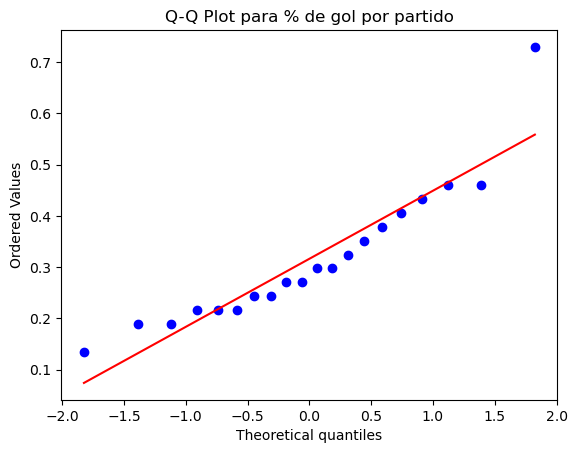

In [377]:
import scipy.stats as stats
import pylab

# Q-Q plot para ''
stats.probplot(my_df['% de gol por partido'], dist="norm", plot=pylab)
plt.title('Q-Q Plot para % de gol por partido')
pylab.show()

### Luego de visualizar el grafico QQ para la variable '% gol por partido' podemos apreciar que aunque no es perfecto en el comienzo y en el final del grafico, la distribucion de los datos es lineal.

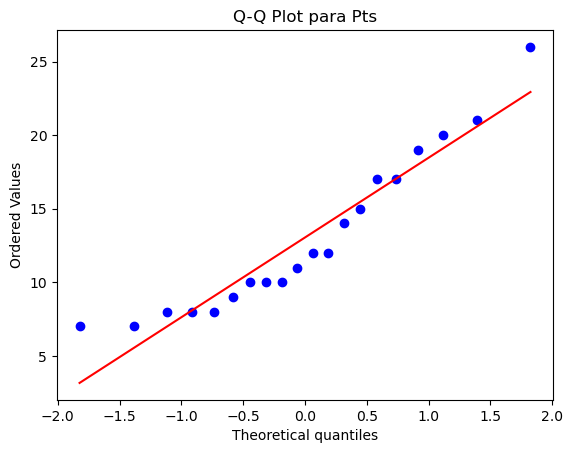

In [378]:
# Q-Q plot para 'Pts_ajustados'
stats.probplot(my_df['W'], dist="norm", plot=pylab)
plt.title('Q-Q Plot para Pts')
pylab.show()

### Podemos ver en este QQ Plot que al igual que nuestra otra columna en observacion '% de goles por partido', en el caso la columna 'W' tambien nos encontramos frente a un caso de distribucion de datos lineales.

In [379]:
# Prueba de Shapiro-Wilk para '% de gol por partido'
shapiro_test_golxpartido = shapiro(my_df['% de gol por partido'])
shapiro_test_golxpartido

ShapiroResult(statistic=0.8799040913581848, pvalue=0.017622288316488266)

In [380]:
# Prueba de Shapiro-Wilk para 'W'
shapiro_test_Pts = shapiro(my_df['W'])
shapiro_test_Pts

ShapiroResult(statistic=0.905463457107544, pvalue=0.052266813814640045)

### En este caso las pruebas de normalidad de Shapiro-Wilk son claras la variable % gol por partido es inferior a 0.05 y la variable 'W' es igual a 0.05 lo que indica que podemos rechazar la hipotesis nula H0 y asumir que los datos no sigue una distribucion normal lo que nos lleva a tener que optar por formas de calcular el valor P no parametricas lo cual optaremos por el metodo Mann-whitney

In [381]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(my_df['% de gol por partido'], my_df['W'])

print(f'Estadístico de prueba: {statistic}')
print(f'Valor p: {p_value}')



Estadístico de prueba: 0.0
Valor p: 6.60629966710624e-08


### El resultado de nuestro test de Mann-Whitney nos arroja como resultado un valor P de 0.000006 aproximadamente al ser un numero pequeño, muy inferior al 0.05 del valor que tomamos como alfa podemos rechazar nuestra Hipotesis Nula H0.

# Presentacion de hallazgos: 

## Luego de la comprobacion visual mediante QQ plot y las prubra de Shapiro-Wilk para nuestras columnas '% de gol por partido' y 'W' (partidos ganados) pudimos comprobar que la distribucion que siguen nuestras variables no es normal por lo que optamos por un utilizar una prueba estadistica no parametrica.
## Una vez seleccionada la prueba de Mann-Witney pudimos comprobar que el valor P de la prueba es super pequeño tanto asi como 0.00000006 por lo tanto muy inferior a nuestro valor alfa establecido de 0.05 por lo que con un 95% de certeza decidimos rechazar la hipotesis nula H0 y quedarnos con la hipotesis alternativa H1 que indica que las variables son dependientes la una de la otra por lo tanto tener un Top Team Scorer en el equipo, con un alto porcentaje de gol por partido puede influir directamente en los partidos ganados durante un campeonato.

# - Exercici 3
### Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [382]:
df_liga_francesa

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
13,14,Monaco,FRA,2,37,20,8,9,63,38,...,68,1.84,56.8,39.7,17.1,0.46,W W W W W,5870,Wissam Ben Yedder - 24,Alexander Nübel
15,16,Marseille,FRA,3,37,20,8,9,59,38,...,68,1.84,56.6,39.2,17.4,0.47,W W L W L,51082,Dimitri Payet - 12,Pau López
19,20,Rennes,FRA,4,37,20,5,12,80,38,...,65,1.76,61.2,39.2,22.0,0.60,L W W L W,25309,Martin Terrier - 21,Alfred Gomis
23,24,Strasbourg,FRA,5,37,17,12,8,60,39,...,63,1.70,58.5,39.9,18.5,0.50,W L D W W,23462,Ludovic Ajorque - 12,Matz Sels
24,25,Nice,FRA,6,37,19,7,11,49,34,...,63,1.70,55.1,44.4,10.6,0.29,L W W W L,15478,Andy Delort - 13,Walter Benítez
27,28,Lens,FRA,7,37,17,10,10,60,46,...,61,1.65,50.5,41.2,9.3,0.25,W D D W W,28460,Arnaud Kalimuendo - 12,Jean-Louis Leca
32,33,Lyon,FRA,8,37,16,11,10,64,50,...,58,1.57,68.3,52.4,15.9,0.43,L W W L W,31103,Moussa Dembélé - 20,Anthony Lopes
38,39,Nantes,FRA,9,37,15,9,13,54,47,...,54,1.46,41.7,53.8,-12.1,-0.33,L W D W L,20368,Randal Kolo Muani - 12,Alban Lafont
39,40,Lille,FRA,10,37,14,12,11,46,46,...,54,1.46,50.9,39.3,11.6,0.31,L W L L W,34025,Jonathan David - 15,Ivo Grbi?


### En este caso trabajaremos con la liga francesa

In [383]:
df_liga_francesa[['Nombre_jugador', 'Goles']] = df_liga_francesa['Top Team Scorer'].str.extract(r'(.+) - (\d+)')
df_liga_francesa["Goles"] = pd.to_numeric(df_liga_francesa["Goles"])

/var/folders/qn/t_d0_whn09sdmbx1px99544c0000gn/T/ipykernel_38974/4284977062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liga_francesa[['Nombre_jugador', 'Goles']] = df_liga_francesa['Top Team Scorer'].str.extract(r'(.+) - (\d+)')
/var/folders/qn/t_d0_whn09sdmbx1px99544c0000gn/T/ipykernel_38974/4284977062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liga_francesa[['Nombre_jugador', 'Goles']] = df_liga_francesa['Top Team Scorer'].str.extract(r'(.+) - (\d+)')
/var/folders/qn/t_d0_whn09sdmb

### Una vez mas dividimos la columna Top Team Scorer en dos columnas nombre_jugador y goles, en esta segunda convertiremos el tipo de dato a numerico

In [384]:
df_liga_francesa['% de gol por partido'] = (df_liga_francesa['Goles'] / df_liga_francesa['MP'])

/var/folders/qn/t_d0_whn09sdmbx1px99544c0000gn/T/ipykernel_38974/744394758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liga_francesa['% de gol por partido'] = (df_liga_francesa['Goles'] / df_liga_francesa['MP'])


### Creamos una nueva columna con el % de gol por partido producto de la division de la cantidad de goles al final del campeonato y la cantidad de partidos jugados.

In [385]:
ex3 = ['LgRk','Squad','Pts','GD','Last 5','Nombre_jugador','Goles','% de gol por partido','MP','W','D','L','Attendance']
my_df3 = df_liga_francesa[ex3]
my_df3

,LgRk,Squad,Pts,GD,Last 5,Nombre_jugador,Goles,% de gol por partido,MP,W,D,L,Attendance
4,1,Paris S-G,83,49,W D D D W,Kylian Mbappé,25,0.675676,37,25,8,4,41188
13,2,Monaco,68,25,W W W W W,Wissam Ben Yedder,24,0.648649,37,20,8,9,5870
15,3,Marseille,68,21,W W L W L,Dimitri Payet,12,0.324324,37,20,8,9,51082
19,4,Rennes,65,42,L W W L W,Martin Terrier,21,0.567568,37,20,5,12,25309
23,5,Strasbourg,63,21,W L D W W,Ludovic Ajorque,12,0.324324,37,17,12,8,23462
24,6,Nice,63,15,L W W W L,Andy Delort,13,0.351351,37,19,7,11,15478
27,7,Lens,61,14,W D D W W,Arnaud Kalimuendo,12,0.324324,37,17,10,10,28460
32,8,Lyon,58,14,L W W L W,Moussa Dembélé,20,0.540541,37,16,11,10,31103
38,9,Nantes,54,7,L W D W L,Randal Kolo Muani,12,0.324324,37,15,9,13,20368
39,10,Lille,54,0,L W L L W,Jonathan David,15,0.405405,37,14,12,11,34025


### Tomamos nuestras columnas de interes para realizar el ejercicio

In [386]:
df_liga_francesa_sorted = my_df3.sort_values(by='LgRk')
df_liga_francesa_sorted.head(8)

,LgRk,Squad,Pts,GD,Last 5,Nombre_jugador,Goles,% de gol por partido,MP,W,D,L,Attendance
4,1,Paris S-G,83,49,W D D D W,Kylian Mbappé,25,0.675676,37,25,8,4,41188
13,2,Monaco,68,25,W W W W W,Wissam Ben Yedder,24,0.648649,37,20,8,9,5870
15,3,Marseille,68,21,W W L W L,Dimitri Payet,12,0.324324,37,20,8,9,51082
19,4,Rennes,65,42,L W W L W,Martin Terrier,21,0.567568,37,20,5,12,25309
23,5,Strasbourg,63,21,W L D W W,Ludovic Ajorque,12,0.324324,37,17,12,8,23462
24,6,Nice,63,15,L W W W L,Andy Delort,13,0.351351,37,19,7,11,15478
27,7,Lens,61,14,W D D W W,Arnaud Kalimuendo,12,0.324324,37,17,10,10,28460
32,8,Lyon,58,14,L W W L W,Moussa Dembélé,20,0.540541,37,16,11,10,31103


### Mostramos de forma ordenada decreciente los goleadores del campeonato

# Planteo de Hipotesis:

## Hipotesis grupo 1:

### Hipótesis nula (H0): Los equipos que tienen un 'Top Team Scorer' con mayor '% gol por partido' no tienen una correlación significativa con la cantidad de publico que asiste como local 'Attendance' osea que la correlación entre 'Top Team Scorer' (Nombre_jugador) '% de gol por partido' y 'Attendance' es igual a cero, por lo que tener un goleador no significa tener mas publico en los estadios.

### Hipótesis alternativa (H1): Los equipos que tienen un Top Team Scorer con mayor cantidad de '% de gol por partido' tienen una correlación significativa con la cantidad de publico en el estadio 'Attendance'. La correlación entre '% de goles por partido' y 'Attendance' no es igual a cero por lo que las variables son dependientes una de otra y tener un goleador influye en la posibilidad de tener mas publico en un partido.

## Hipotesis grupo 2:

### Hipótesis nula (H0): Los equipos que tienen mayor cantidad de partidos ganados 'W' no tienen una correlación significativa con la cantidad de publico que asiste como local 'Attendance' osea que la correlación entre 'W' y 'Attendance' es igual a cero, por lo que tener un goleador no significa tener mas publico en los estadios.

### Hipótesis alternativa (H1): Los equipos que tienen mayor cantidad de partidos ganados 'W' tienen una correlación significativa con la cantidad de publico en el estadio 'Attendance'. La correlación entre 'W' y 'Attendance' no es igual a cero por lo que las variables son dependientes una de otra y tener un goleador influye en la posibilidad de tener mas publico en un partido.


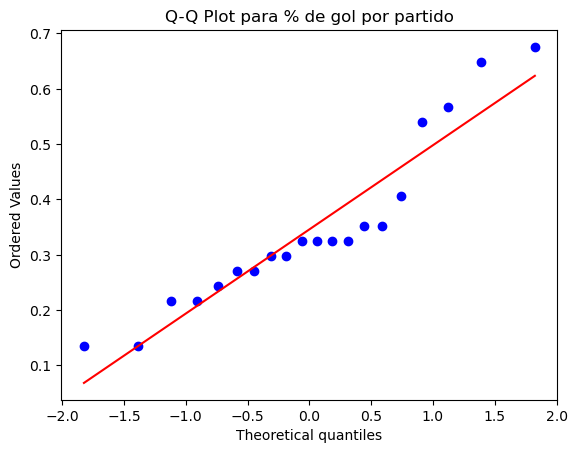

In [387]:
import scipy.stats as stats
import pylab

# Q-Q plot para ''
stats.probplot(my_df3['% de gol por partido'], dist="norm", plot=pylab)
plt.title('Q-Q Plot para % de gol por partido')
pylab.show()

### Realizamos un primer QQ Plot para la columna '% de gol por partido' en donde podemos ver que si bien siguen un orden lineal existen valores que estan fuera de lo normal

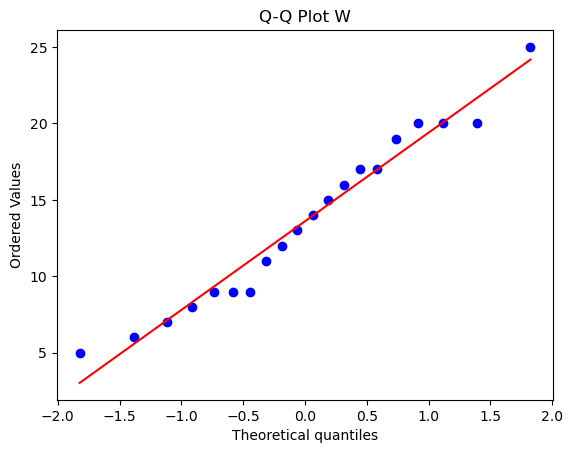

In [388]:
import scipy.stats as stats
import pylab

# Q-Q plot para 'W'
stats.probplot(my_df3['W'], dist="norm", plot=pylab)
plt.title('Q-Q Plot W')
pylab.show()

### en el caso de nuestra columna 'W' partidos ganados sigue una distribucion mas normal.

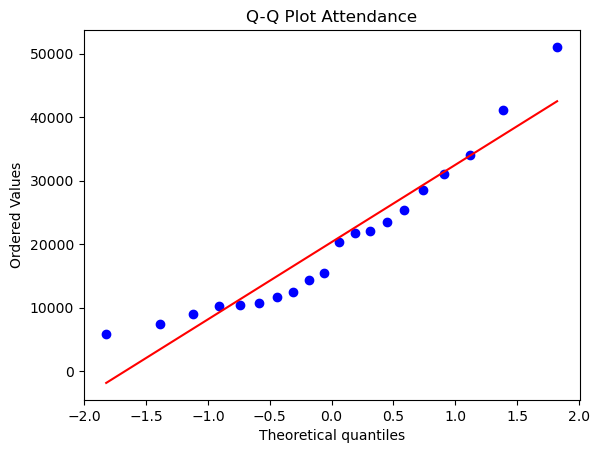

In [389]:
import scipy.stats as stats
import pylab

# Q-Q plot para ''
stats.probplot(my_df3['Attendance'], dist="norm", plot=pylab)
plt.title('Q-Q Plot Attendance')
pylab.show()

### De igual manera graficamos nuestra ultima columna en observacion 'Attendance' con la cantidad de publico por partido como local

In [390]:
# Prueba de Shapiro-Wilk para '% de gol por partido'
shapiro_test_goles = shapiro(my_df3['Goles'])
shapiro_test_goles

ShapiroResult(statistic=0.891990602016449, pvalue=0.02926107868552208)

In [391]:
# Prueba de Shapiro-Wilk para 'W'
shapiro_test_w = shapiro(my_df3['W'])
shapiro_test_w

ShapiroResult(statistic=0.9602999091148376, pvalue=0.5498579740524292)

In [392]:
# Prueba de Shapiro-Wilk para 'Attendance'
shapiro_test_attendance = shapiro(my_df3['Attendance'])
shapiro_test_attendance

ShapiroResult(statistic=0.9079817533493042, pvalue=0.05834170803427696)

### Luego de realizar las pruebas de normalidad de Shapiro-Wilk para nuestras 3 variables podemos decir que los datos no siguen una distribucion normal ya que en todos los casos son iguales o inferiores a 0.05 por lo que procederemos a utilizar la prueba de Wilcoxon para trabajar con muestras grupales no parametricas.

In [393]:
from scipy.stats import wilcoxon

# Comparación Wilcoxon para '% de gol por partido' y 'Attendance'
stat_gol, p_value_gol = wilcoxon(my_df3['% de gol por partido'], my_df3['Attendance'])
stat_gol, p_value_gol

(0.0, 1.9073486328125e-06)

In [394]:
from scipy.stats import wilcoxon

# Comparación Wilcoxon para 'W' y 'Attendance'
stat_w, p_value_w = wilcoxon(my_df3['W'], my_df3['Attendance'])
stat_w, p_value_w

(0.0, 1.9073486328125e-06)

### Luego de realizar las pruebas en dos grupos podemos ver que en ambos casos el valor P es muy pequeño, al ser inferior a nuestro alfa situado en 0.05 podemos rechazar la hiposis nula, asumiendo que la hipotesis H1 es la correcta con un 95% de acierto.

# Presentacion de hallazgos: 

## Luego de la comprobacion visual mediante QQ plot y las prubra de Shapiro-Wilk para nuestras columnas '% de gol por partido' y 'W' (partidos ganados) y 'Attendance' pudimos comprobar que la distribucion que siguen nuestras variables no es normal por lo que optamos por un utilizar una prueba estadistica no parametrica.

## Una vez seleccionada la prueba de Wilcox pudimos comprobar que el valor P de la prueba es super pequeño, por lo tanto muy inferior a nuestro valor alfa establecido de 0.05 por lo que con un 95% de certeza decidimos rechazar la hipotesis nula H0 y quedarnos con la hipotesis alternativa H1 que indica que las variables son dependientes la una de la otra por lo tanto tener un Top Team Scorer en el equipo, con un alto porcentaje de gol por partido y Tener mayor cantidad de partidos ganados 'W' puede influir directamente en la cantidad de publico que asiste como local a ver un partido 'Attendance'.